In [ ]:
!unzip "/content/drive/MyDrive/data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: data/traindev/copy-moved/images/c_0988.jpg  
  inflating: data/traindev/copy-moved/images/c_0989.tif  
  inflating: data/traindev/copy-moved/images/c_0990.jpg  
  inflating: data/traindev/copy-moved/images/c_0991.tif  
  inflating: data/traindev/copy-moved/images/c_0992.tif  
  inflating: data/traindev/copy-moved/images/c_0993.jpg  
  inflating: data/traindev/copy-moved/images/c_0994.tif  
  inflating: data/traindev/copy-moved/images/c_0995.jpg  
  inflating: data/traindev/copy-moved/images/c_0996.tif  
  inflating: data/traindev/copy-moved/images/c_0997.jpg  
  inflating: data/traindev/copy-moved/images/c_0998.tif  
  inflating: data/traindev/copy-moved/images/c_0999.tif  
  inflating: data/traindev/copy-moved/images/c_1000.tif  
  inflating: data/traindev/copy-moved/images/c_1001.jpg  
  inflating: data/traindev/copy-moved/images/c_1002.tif  
  inflating: data/traindev/copy-moved/images/c_1003.tif  
  inflating: data/tra

In [ ]:
 #Import Libraries

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from tensorflow.keras.optimizers import *
from tqdm import tqdm
import cv2
%load_ext tensorboard
import datetime
from keras.utils.vis_utils import plot_model

In [ ]:
fake_image_data={'image_path':[],'label':[],'image_id':[]}

In [ ]:
import os
fake_image_data_train={'image_path':[],'label':[],'image_id':[]}
fake_image_path='/content/data/train/spliced/images'
for img in os.listdir(fake_image_path) :
    temp_path=fake_image_path+"/"+str(img)
    fake_image_data_train['image_path'].append(temp_path)
    fake_image_data_train['label'].append('fake')
    fake_image_data_train['image_id'].append(img[:-4])

In [ ]:
fake_image_data_train=pd.DataFrame(fake_image_data_train)
fake_image_data_train.head()

,image_path,label,image_id
0,/content/data/train/spliced/images/s_1034.jpg,fake,s_1034
1,/content/data/train/spliced/images/s_1354.jpg,fake,s_1354
2,/content/data/train/spliced/images/s_0396.tif,fake,s_0396
3,/content/data/train/spliced/images/s_1035.tif,fake,s_1035
4,/content/data/train/spliced/images/s_0336.jpg,fake,s_0336


In [ ]:
fake_image_data_train.sort_values(by='image_id', ascending=True, inplace=True)
fake_image_data_train.head()

,image_path,label,image_id
564,/content/data/train/spliced/images/s_0001.tif,fake,s_0001
247,/content/data/train/spliced/images/s_0002.tif,fake,s_0002
199,/content/data/train/spliced/images/s_0003.jpg,fake,s_0003
565,/content/data/train/spliced/images/s_0004.tif,fake,s_0004
1421,/content/data/train/spliced/images/s_0005.jpg,fake,s_0005


In [ ]:
import os
fake_image_data_test={'image_path':[],'label':[],'image_id':[]}
fake_image_path='/content/data/test/spliced/images'
for img in os.listdir(fake_image_path) :
    temp_path=fake_image_path+"/"+str(img)
    fake_image_data_test['image_path'].append(temp_path)
    fake_image_data_test['label'].append('fake')
    fake_image_data_test['image_id'].append(img[:-4])

In [ ]:
fake_image_data_test=pd.DataFrame(fake_image_data_test)
fake_image_data_test.head()

,image_path,label,image_id
0,/content/data/test/spliced/images/s_0119.jpg,fake,s_0119
1,/content/data/test/spliced/images/s_0044.jpg,fake,s_0044
2,/content/data/test/spliced/images/s_0093.jpg,fake,s_0093
3,/content/data/test/spliced/images/s_0071.jpg,fake,s_0071
4,/content/data/test/spliced/images/s_0027.tif,fake,s_0027


In [ ]:
fake_image_data_test.sort_values(by='image_id', ascending=True, inplace=True)
fake_image_data_test.head()

,image_path,label,image_id
74,/content/data/test/spliced/images/s_0001.jpg,fake,s_0001
20,/content/data/test/spliced/images/s_0002.tif,fake,s_0002
16,/content/data/test/spliced/images/s_0003.jpg,fake,s_0003
49,/content/data/test/spliced/images/s_0004.jpg,fake,s_0004
67,/content/data/test/spliced/images/s_0005.tif,fake,s_0005


In [ ]:
fake_image_mask_train={'image_id':[],'mask_image_path':[]}
fake_image_mask_path='/content/data/train/spliced/masks'
for file in os.listdir(fake_image_mask_path):
    temp_path=fake_image_mask_path+"/"+str(file)
    fake_image_mask_train['mask_image_path'].append(temp_path)
    fake_image_mask_train['image_id'].append(file[:-4])
fake_image_mask_train=pd.DataFrame(fake_image_mask_train)
fake_image_mask_train.tail()

,image_id,mask_image_path
1489,s_0888,/content/data/train/spliced/masks/s_0888.png
1490,s_1195,/content/data/train/spliced/masks/s_1195.png
1491,s_1150,/content/data/train/spliced/masks/s_1150.png
1492,s_1448,/content/data/train/spliced/masks/s_1448.png
1493,s_0865,/content/data/train/spliced/masks/s_0865.png


In [ ]:
fake_image_mask_train.sort_values(by='image_id', ascending=True, inplace=True)
fake_image_mask_train.head()

,image_id,mask_image_path
834,s_0001,/content/data/train/spliced/masks/s_0001.png
955,s_0002,/content/data/train/spliced/masks/s_0002.png
600,s_0003,/content/data/train/spliced/masks/s_0003.png
114,s_0004,/content/data/train/spliced/masks/s_0004.png
47,s_0005,/content/data/train/spliced/masks/s_0005.png


In [ ]:
fake_image_mask_test={'image_id':[],'mask_image_path':[]}
fake_image_mask_path='/content/data/test/spliced/masks'
for file in os.listdir(fake_image_mask_path):
    temp_path=fake_image_mask_path+"/"+str(file)
    fake_image_mask_test['mask_image_path'].append(temp_path)
    fake_image_mask_test['image_id'].append(file[:-4])
fake_image_mask_test=pd.DataFrame(fake_image_mask_test)
fake_image_mask_test.tail()

,image_id,mask_image_path
161,s_0166,/content/data/test/spliced/masks/s_0166.png
162,s_0117,/content/data/test/spliced/masks/s_0117.png
163,s_0037,/content/data/test/spliced/masks/s_0037.png
164,s_0018,/content/data/test/spliced/masks/s_0018.png
165,s_0095,/content/data/test/spliced/masks/s_0095.png


In [ ]:
fake_image_mask_test.sort_values(by='image_id', ascending=True, inplace=True)
fake_image_mask_test.head()

,image_id,mask_image_path
83,s_0001,/content/data/test/spliced/masks/s_0001.png
102,s_0002,/content/data/test/spliced/masks/s_0002.png
63,s_0003,/content/data/test/spliced/masks/s_0003.png
14,s_0004,/content/data/test/spliced/masks/s_0004.png
6,s_0005,/content/data/test/spliced/masks/s_0005.png


In [ ]:
fake_image_data_train = fake_image_data_train.merge(fake_image_mask_train, on='image_id')
fake_image_data_test = fake_image_data_test.merge(fake_image_mask_test, on='image_id')

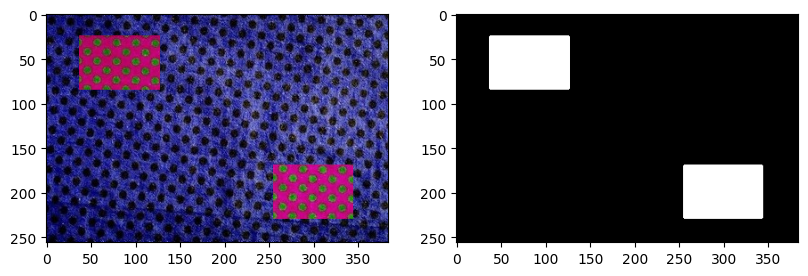

In [ ]:
#Let's look at one example
ran_num=np.random.randint(0,fake_image_data_train.shape[0])
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
temp_arr=Image.open(fake_image_data_train.iloc[ran_num]['image_path'])
temp_mask_arr=cv2.imread(fake_image_data_train.iloc[ran_num]['mask_image_path'],0)
ax1.imshow(temp_arr)
ax2.imshow(temp_mask_arr,cmap='gray')

In [ ]:
def change_pixel_value(A) :
    if len(A.shape)==3 :
        A=A[:,:,0]
    #Intilize a array B
    B=np.zeros((A.shape[0],A.shape[1]))
    for i in range(A.shape[0]) :
        for j in range(A.shape[1]) :
            if A[i][j]==255 :
                B[i][j]=0.0
            else :
                B[i][j]=1.0
    return B

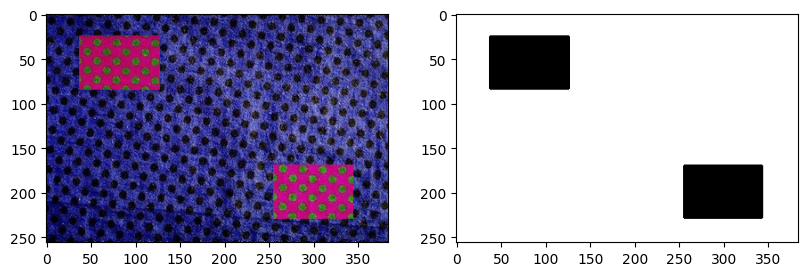

In [ ]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
temp_mask_arr_mod=change_pixel_value(temp_mask_arr)
ax1.imshow(temp_arr)
ax2.imshow(temp_mask_arr_mod,cmap='gray')

SRM FILTER

In [ ]:
import numpy as np
q = [4.0, 12.0, 2.0]
filter1 = [[0, 0, 0, 0, 0],
           [0, -1, 2, -1, 0],
           [0, 2, -4, 2, 0],
           [0, -1, 2, -1, 0],
           [0, 0, 0, 0, 0]]
filter2 = [[-1, 2, -2, 2, -1],
           [2, -6, 8, -6, 2],
           [-2, 8, -12, 8, -2],
           [2, -6, 8, -6, 2],
           [-1, 2, -2, 2, -1]]
filter3 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [0, 1, -2, 1, 0],
           [0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0]]


filter1 = np.asarray(filter1, dtype=float) / q[0]
filter2 = np.asarray(filter2, dtype=float) / q[1]
filter3 = np.asarray(filter3, dtype=float) / q[2]

filters = filter1+filter2+filter3

In [ ]:
class Dataset:
    def __init__(self, data):
        self.image_path = []
        self.mask_image_path = []

        for index,rows in data.iterrows() :
            self.image_path.append(rows['image_path'])
            self.mask_image_path.append(rows['mask_image_path'])


    def __getitem__(self, i):
        #Load images
        img=cv2.imread(self.image_path[i],cv2.IMREAD_UNCHANGED)
        mask_img=cv2.imread(self.mask_image_path[i],0)
        #Converting image to 256,256,3
        #after analyzing i found a single image with 256*256*4
        if img.shape[-1]!=3 :
            img=cv2.resize(img[:,:,:3],(512,512))
        else :
            img=cv2.resize(img,(512,512))
        #Converting mask image into 256*256
        #We observe some image are 2-d only some are 3-d
        if len(mask_img.shape)==2 :
            mask_img=cv2.resize(mask_img,(512,512))
        else :
            mask_img=cv2.resize(mask_img[:,:,0],(512,512))

        #Processed image
        preprocess_img=cv2.filter2D(img,-1,filters)
        #process mask image
        mask_img_mod=change_pixel_value(mask_img)




        return img,preprocess_img,mask_img_mod


    def __len__(self): # your model.fit_gen requires this function
        return len(self.image_path)


class Dataloder(tf.keras.utils.Sequence):
    def __init__(self, dataset, batch_size=1,shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle=shuffle
        self.indexes = np.arange(len(self.dataset.image_path))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        #batch = [for samples in zip(*data)]
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        batch[2]=batch[2].reshape((self.batch_size,512,512,1))

        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

train_dataset=Dataset(fake_image_data_train)
train_dataloader = Dataloder(train_dataset, batch_size=8,shuffle=True)

In [ ]:
test_dataset=Dataset(fake_image_data_test)
test_dataloader = Dataloder(test_dataset, batch_size=8,shuffle=True)

Model Compiling and training


In [ ]:
def conv2d_block(input_dim, n_filters, kernel_size=3, batchnorm=True):
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",padding="same") (input_dim)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

#This part is for input image

input_img = Input((512, 512, 3))
# contracting path
conv11 = conv2d_block(input_img, n_filters=16, kernel_size=3, batchnorm=True)
pool11 = MaxPooling2D((2, 2)) (conv11)
pool11 = Dropout(0.5)(pool11)
conv12 = conv2d_block(pool11, n_filters=32, kernel_size=3, batchnorm=True)
pool12 = MaxPooling2D((2, 2)) (conv12)
pool12 = Dropout(0.5)(pool12)
conv13 = conv2d_block(pool12, n_filters=64, kernel_size=3, batchnorm=True)
pool13 = MaxPooling2D((2, 2)) (conv13)
pool13 = Dropout(0.5)(pool13)
conv14 = conv2d_block(pool13, n_filters=128, kernel_size=3, batchnorm=True)
pool14 = MaxPooling2D(pool_size=(2, 2)) (conv14)
pool14 = Dropout(0.5)(pool14)
conv15 = conv2d_block(pool14, n_filters=256, kernel_size=3, batchnorm=True)
#Expanding path
u6 = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same') (conv15)
#skip_connections
u6 = concatenate([u6, conv14])
u6 = Dropout(0.5)(u6)
c6 = conv2d_block(u6, n_filters=128, kernel_size=3, batchnorm=True)
u7 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, conv13])
u7 = Dropout(0.5)(u7)
c7 = conv2d_block(u7, n_filters=64, kernel_size=3, batchnorm=True)
u8 = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, conv12])
u8 = Dropout(0.5)(u8)
c8 = conv2d_block(u8, n_filters=32, kernel_size=3, batchnorm=True)
u9 = Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, conv11], axis=3)
u9 = Dropout(0.5)(u9)
c9 = conv2d_block(u9, n_filters=16, kernel_size=3, batchnorm=True)

output = Conv2D(3, (1, 1), activation='sigmoid') (c9)


#This part is for SRM filter output image

input_img_filter = Input((512, 512, 3))

# contracting path
conv21 = conv2d_block(input_img_filter, n_filters=16, kernel_size=3, batchnorm=True)
pool21 = MaxPooling2D((2, 2)) (conv21)
pool21 = Dropout(0.5)(pool21)
conv22 = conv2d_block(pool21, n_filters=32, kernel_size=3, batchnorm=True)
pool22 = MaxPooling2D((2, 2)) (conv22)
pool22 = Dropout(0.5)(pool22)
conv23 = conv2d_block(pool22, n_filters=64, kernel_size=3, batchnorm=True)
pool23 = MaxPooling2D((2, 2)) (conv23)
pool23 = Dropout(0.5)(pool23)
conv24 = conv2d_block(pool23, n_filters=128, kernel_size=3, batchnorm=True)
pool24 = MaxPooling2D(pool_size=(2, 2)) (conv24)
pool24 = Dropout(0.5)(pool24)
conv25 = conv2d_block(pool24, n_filters=256, kernel_size=3, batchnorm=True)
#Expanding path
u6 = Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same') (conv25)
#skip_connections
u6 = concatenate([u6, conv24])
u6 = Dropout(0.5)(u6)
c6 = conv2d_block(u6, n_filters=128, kernel_size=3, batchnorm=True)
u7 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, conv23])
u7 = Dropout(0.5)(u7)
c7 = conv2d_block(u7, n_filters=64, kernel_size=3, batchnorm=True)
u8 = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, conv22])
u8 = Dropout(0.5)(u8)
c8 = conv2d_block(u8, n_filters=32, kernel_size=3, batchnorm=True)
u9 = Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, conv11], axis=3)
u9 = Dropout(0.5)(u9)
c9 = conv2d_block(u9, n_filters=16, kernel_size=3, batchnorm=True)

output_filter = Conv2D(3, (1, 1), activation='sigmoid') (c9)

combined = concatenate([output, output_filter])
outputs = Conv2D(1, (1, 1), activation='sigmoid') (combined)

model = Model(inputs=[input_img,input_img_filter], outputs=[outputs])

In [ ]:
def scheduler(epoch,lr) :
  if epoch%5==0 :
    lr=0.9*lr

  return lr

In [ ]:
lrScheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
model.fit_generator(train_dataloader,validation_data=test_dataloader, steps_per_epoch=5,epochs=5,callbacks=[lrScheduler,tensorboard_callback])

Epoch 1/5
5/5 [==============================] - 230s 43s/step - loss: 0.5093 - accuracy: 0.8594 - val_loss: 0.4334 - val_accuracy: 0.8712 - lr: 9.0000e-04
Epoch 2/5
5/5 [==============================] - 134s 32s/step - loss: 0.4732 - accuracy: 0.8894 - val_loss: 0.4171 - val_accuracy: 0.8707 - lr: 9.0000e-04
Epoch 3/5
5/5 [==============================] - 133s 32s/step - loss: 0.4522 - accuracy: 0.8884 - val_loss: 0.4598 - val_accuracy: 0.8701 - lr: 9.0000e-04
Epoch 4/5
5/5 [==============================] - 134s 32s/step - loss: 0.4715 - accuracy: 0.8348 - val_loss: 0.5337 - val_accuracy: 0.8284 - lr: 9.0000e-04
Epoch 5/5
5/5 [==============================] - 133s 32s/step - loss: 0.4399 - accuracy: 0.8724 - val_loss: 0.6781 - val_accuracy: 0.6855 - lr: 9.0000e-04


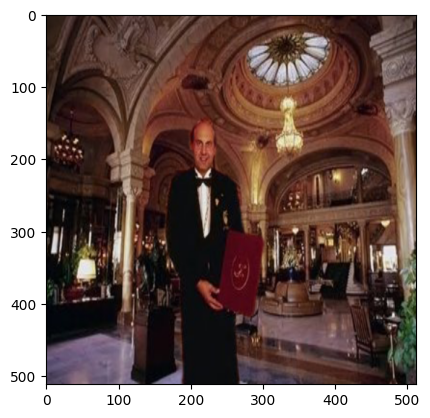

In [ ]:
ran_num=np.random.randint(0,fake_image_data_train.shape[0])
image_arr=np.array(Image.open(fake_image_data_train.iloc[ran_num]['image_path']))
mask_arr=np.array(Image.open(fake_image_data_train.iloc[ran_num]['mask_image_path']))
mask_arr_mod=change_pixel_value(mask_arr)
img_arr=cv2.resize(image_arr,(512,512))
preprocess_img=cv2.filter2D(img_arr,-1,filters)
preprocess_img=cv2.resize(preprocess_img,(512,512))
img_arr=img_arr.reshape(1,512,512,3)
preprocess_img=preprocess_img.reshape(1,512,512,3)
plt.imshow(img_arr[0])


In [ ]:
pred=model.predict([img_arr,preprocess_img])[0]
pred=pred.reshape(512,512)

1/1 [==============================] - 0s 25ms/step


In [ ]:
pred

array([[0.67866415, 0.64839333, 0.6749512 , ..., 0.6261911 , 0.6858563 ,
        0.61093783],
       [0.63188195, 0.7033994 , 0.57229316, ..., 0.67571646, 0.79506767,
        0.83862966],
       [0.6235601 , 0.61502177, 0.60225034, ..., 0.58093727, 0.6128243 ,
        0.4379398 ],
       ...,
       [0.54566306, 0.65281445, 0.510663  , ..., 0.6456645 , 0.39645308,
        0.5539605 ],
       [0.6306342 , 0.5926782 , 0.57895464, ..., 0.58399117, 0.5930632 ,
        0.6128961 ],
       [0.5844091 , 0.4894039 , 0.5276639 , ..., 0.6590413 , 0.4347523 ,
        0.5389644 ]], dtype=float32)

In [ ]:
for i in range(pred.shape[0]) :
    for j in range(pred.shape[1]) :
        if pred[i][j]>0.55:
            pred[i][j]=1.0
        else :
            pred[i][j]=0.0

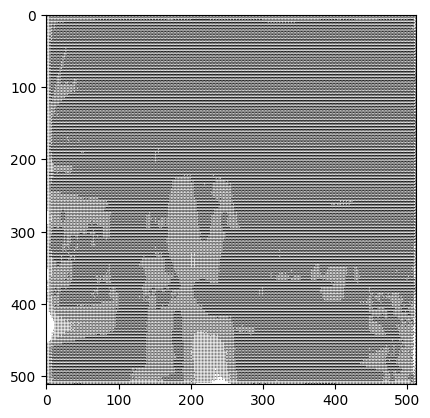

In [ ]:
plt.imshow(pred,cmap='gray')

In [ ]:
model_json = model.to_json()
with open('phase2_splice.json', 'w') as json_file:
    json_file.write(model_json)

# Save model weights in H5 format
model.save_weights('phase2_splice_weights.h5')